<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Example-Dataframe:" data-toc-modified-id="Example-Dataframe:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example Dataframe:</a></span></li><li><span><a href="#Plotting-Data" data-toc-modified-id="Plotting-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting Data</a></span></li><li><span><a href="#Computing-Loss" data-toc-modified-id="Computing-Loss-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Computing Loss</a></span></li><li><span><a href="#Comparing-Times-RandomForestClassifier-with-Scikit" data-toc-modified-id="Comparing-Times-RandomForestClassifier-with-Scikit-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing Times RandomForestClassifier with Scikit</a></span></li><li><span><a href="#Using-a-bigger-dataset" data-toc-modified-id="Using-a-bigger-dataset-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using a bigger dataset</a></span></li><li><span><a href="#Comparing-Results-RandomForestClassifier-vs-Scikit" data-toc-modified-id="Comparing-Results-RandomForestClassifier-vs-Scikit-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparing Results RandomForestClassifier vs Scikit</a></span></li><li><span><a href="#Quick-Test-with-tsallis-entroy" data-toc-modified-id="Quick-Test-with-tsallis-entroy-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Quick Test with tsallis entroy</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import RandomForestClassifier as RandomForest
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
import math

%load_ext autoreload
%autoreload 2

### Example Dataframe:

In [2]:
data = pd.DataFrame([                 
 [-9,10,1],    
  [-7,6,1],  
  [ 1,7,1],   
  [5,7,1],   
  [4,6,1],   
  [5,-6,1],   
  [9,6,0],   
  [3,3,0],   
  [-8,2,0],   
  [-3,-2,0],   
  [ 6,-3,0],
  [-7,-6,0]])

data.columns = ["F1","F2","Target"]

In [3]:
table_1 = data.copy()
print(table_1.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 F1 &  F2 &  Target \\
\midrule
 -9 &  10 &       1 \\
 -7 &   6 &       1 \\
  1 &   7 &       1 \\
  5 &   7 &       1 \\
  4 &   6 &       1 \\
  5 &  -6 &       1 \\
  9 &   6 &       0 \\
  3 &   3 &       0 \\
 -8 &   2 &       0 \\
 -3 &  -2 &       0 \\
  6 &  -3 &       0 \\
 -7 &  -6 &       0 \\
\bottomrule
\end{tabular}



### Plotting Data

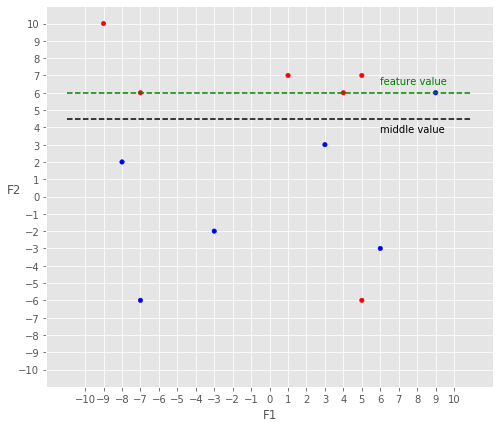

In [4]:
matplotlib.style.use('ggplot')

col = data.Target.map({0:'b', 1:'r'})

shape = data.Target.map({0:'x', 1:'.'})
shape = list(shape.values)

data.plot.scatter(x='F1', y='F2', s=80,c=col, ylim=(-11,11),
                  xticks=range(-10,11), yticks=range(-10,11),
                  marker=".",
                 figsize=(8,7))

plt.ylabel('F2', rotation=0)
plt.hlines(6,-11,11,color="green",linestyles="--")
plt.text(6,6.5,"feature value", color="green")
plt.hlines(4.5,-11,11,color="black",linestyles="--")
plt.text(6,3.7,"middle value", color="black")
plt.savefig("Dataset_split_values.pdf")

### Computing Loss

In [5]:
features = list(data.columns)
features.remove('Target')
x = np.array(data[features])
y = np.array(data['Target'])

In [6]:
def gini(y):
    if len(y)==0: return 0
    _,counts = np.unique(y,return_counts=True)
    probs = counts/counts.sum()
    gini = np.sum(probs*probs)
    return 1-gini

In [7]:
%%timeit 
gini(y)

25.9 µs ± 240 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
def entropy(y):   
    if len(y)==0: return 0
    _,counts = np.unique(y,return_counts=True)
    probs = counts/counts.sum()
    return -np.sum(np.log2(probs)*probs)

In [9]:
%%timeit 
entropy(y)

25.6 µs ± 653 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
def tsallis_entropy(y,q = 4):
    if len(y)==0: return 0
    _,counts = np.unique(y,return_counts=True)
    probs = counts/counts.sum()
    return (1-np.sum(probs**q))*(1/(q-1))

In [11]:
%%timeit 
tsallis_entropy(y)

28.7 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Comparing Times RandomForestClassifier with Scikit

In [13]:
%%timeit
RF1 = RandomForest.RandomForestClassifier(n_estimators = 1000)
RF1.fit(x,y)
RF1.predict(x)

2.16 s ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
RF1 = RandomForest.RandomForestClassifier(n_estimators = 1000)
RF1.fit(x,y)

In [14]:
%%timeit
RandomForestScikit = RandomForestClassifier(n_estimators = 1000)
RandomForestScikit.fit(x,y)
RandomForestScikit.predict(x)

953 ms ± 20.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Using a bigger dataset

In [15]:
x_iris = datasets.load_iris()['data']
y_iris = datasets.load_iris()['target']

In [17]:
%%timeit
RF2 = RandomForest.RandomForestClassifier(n_estimators = 1000)
RF2.fit(x_iris,y_iris)
RF2.predict(x_iris)

21.6 s ± 257 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
RandomForestScikit = RandomForestClassifier(n_estimators = 1000)
RandomForestScikit.fit(x_iris,y_iris)
RandomForestScikit.predict(x_iris)

978 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Comparing Results RandomForestClassifier vs Scikit

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.33, random_state=42)

In [20]:
RF3 = RandomForest.RandomForestClassifier(n_estimators = 1000)
RF3.fit(X_train,y_train)
accuracy_score(RF3.predict(X_test),y_test)

0.98

In [21]:
RandomForestScikit2 = RandomForestClassifier(n_estimators = 1000)
RandomForestScikit2.fit(X_train,y_train)
accuracy_score(RandomForestScikit2.predict(X_test),y_test)

0.98

In [22]:
accuracy_score(RF3.predict(X_test),RandomForestScikit2.predict(X_test))

1.0

### Quick Test with tsallis entroy

In [23]:
RF4 = RandomForest.RandomForestClassifier(n_estimators = 1000,loss = tsallis_entropy)
RF4.fit(X_train,y_train)
accuracy_score(RF3.predict(X_test),y_test)

0.98

In [24]:
accuracy_score(RF3.predict(X_test),RF4.predict(X_test))

1.0